# Trading Data and returns Exercise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Data
Load data trades from CSV file into a pandas Dataframe.

In [2]:
file_path = r'..\data\trade_history_closings.csv'
trades_df = pd.read_csv(file_path)
print(trades_df.head())

       ticket                 time  type  symbol  volume        price  profit  \
0  1211895662  2023-02-13 17:01:15     0  EURUSD    0.01      1.07050   -2.65   
1  1211955019  2023-02-14 15:47:13     0  EURUSD    0.01      1.07658    0.46   
2  1211955762  2023-02-14 15:50:21     0  NAS100    0.01  12540.38000   -0.70   
3  1211956010  2023-02-14 15:51:28     1  SPX500    0.01   4150.69000   -0.20   
4  1211956318  2023-02-14 15:52:57     0  NAS100    0.01  12511.63000   -0.01   

   swap  commission  
0   0.0         0.0  
1   0.0         0.0  
2   0.0         0.0  
3   0.0         0.0  
4   0.0         0.0  


In [6]:
trades_df['time'] = pd.to_datetime(trades_df['time'])  # Convert strings to datetime objects for time-based plotting

### Calculating profit percentage change
$$\text{Profit Percentage Change}_t = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100\%$$

In [7]:
trades_df['profit_pct_change'] = trades_df['profit'].pct_change()

In [8]:
print(trades_df.head())

       ticket                time  type  symbol  volume        price  profit  \
0  1211895662 2023-02-13 17:01:15     0  EURUSD    0.01      1.07050   -2.65   
1  1211955019 2023-02-14 15:47:13     0  EURUSD    0.01      1.07658    0.46   
2  1211955762 2023-02-14 15:50:21     0  NAS100    0.01  12540.38000   -0.70   
3  1211956010 2023-02-14 15:51:28     1  SPX500    0.01   4150.69000   -0.20   
4  1211956318 2023-02-14 15:52:57     0  NAS100    0.01  12511.63000   -0.01   

   swap  commission  profit_pct_change  
0   0.0         0.0                NaN  
1   0.0         0.0          -1.173585  
2   0.0         0.0          -2.521739  
3   0.0         0.0          -0.714286  
4   0.0         0.0          -0.950000  


## By trade number

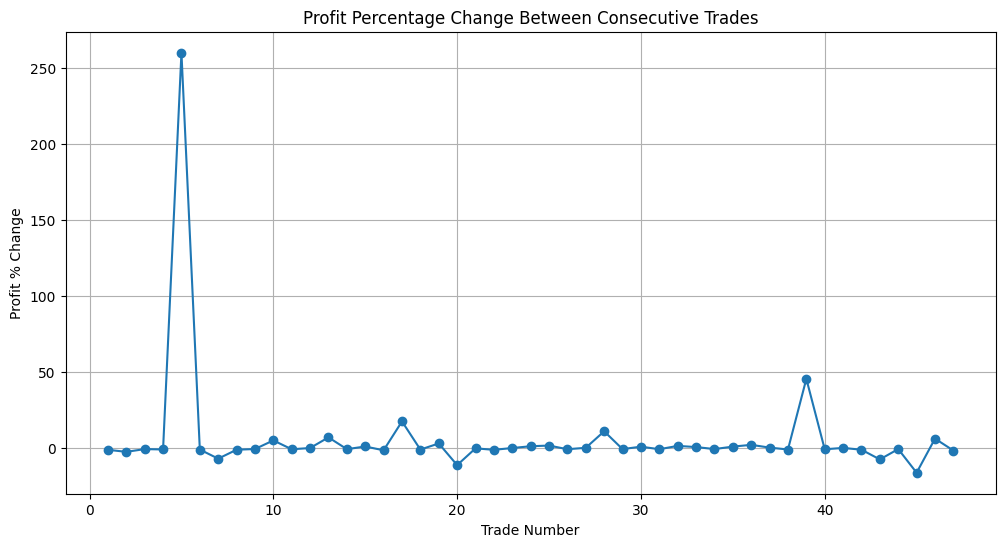

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(trades_df['profit_pct_change'], marker='o')
plt.title('Profit Percentage Change Between Consecutive Trades')
plt.xlabel('Trade Number')
plt.ylabel('Profit % Change')
plt.grid(True)
plt.show()

## Return by trade
$$\text{Return} = \frac{\text{Profit}}{\text{Volume} \times \text{Price}}$$

In [14]:
trades_df['returns'] = trades_df['profit'] / (trades_df['volume'] * trades_df['price'])  # Return as % of position value

In [15]:
print(trades_df)

        ticket                time  type  symbol  volume        price  profit  \
0   1211895662 2023-02-13 17:01:15     0  EURUSD    0.01      1.07050   -2.65   
1   1211955019 2023-02-14 15:47:13     0  EURUSD    0.01      1.07658    0.46   
2   1211955762 2023-02-14 15:50:21     0  NAS100    0.01  12540.38000   -0.70   
3   1211956010 2023-02-14 15:51:28     1  SPX500    0.01   4150.69000   -0.20   
4   1211956318 2023-02-14 15:52:57     0  NAS100    0.01  12511.63000   -0.01   
5   1263932278 2025-03-27 17:39:05     0  SPX500    0.01   5729.16000   -2.61   
6   1263934894 2025-03-27 17:43:18     1  SPX500    0.01   5730.47000    0.04   
7   1263939152 2025-03-27 17:53:40     0  SPX500    0.01   5731.55000   -0.24   
8   1263939348 2025-03-27 17:53:54     1  SPX500    0.01   5731.80000    0.03   
9   1263945830 2025-03-27 18:13:21     0  SPX500    0.01   5731.24000    0.01   
10  1263946383 2025-03-27 18:16:08     0  SPX500    0.01   5730.49000    0.06   
11  1263946797 2025-03-27 18

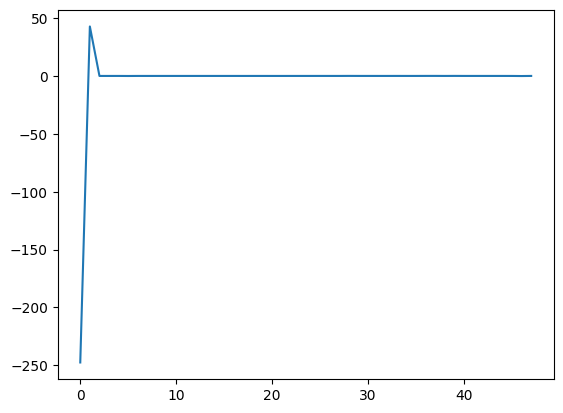

In [16]:
trades_df['returns'].plot()
plt.show()